In [1]:
import networkx as nx
import matplotlib.pyplot as plt

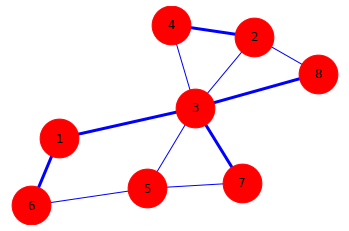

In [2]:
fig, ax = plt.subplots(1)

G = nx.Graph()

G.add_edge('1', '6', tezina=1)
G.add_edge('1', '3', tezina=1)
G.add_edge('2', '4', tezina=1)
G.add_edge('2', '3', tezina=-1)
G.add_edge('2', '8', tezina=-1)
G.add_edge('3', '5', tezina=-1)
G.add_edge('3', '7', tezina=1)
G.add_edge('3', '8', tezina=1)
G.add_edge('3', '4', tezina=-1)
G.add_edge('5', '6', tezina=-1)
G.add_edge('5', '7', tezina=-1)


oznake = nx.get_edge_attributes(G, 'tezina')
tezine = [G[u][v]['tezina'] + 2 for u,v in G.edges()]

pos = nx.spring_layout(G)

nx.draw(G, pos, ax, width=tezine, node_size=1500, with_labels=True, node_color='r', edge_color= 'b')

# SVP

In [3]:
import numpy as np

In [4]:

def svp(A, k, delta, p):
    (m, n) = A.shape
    X = np.zeros(A.shape)
    
    counter = 0
    
    # http://www.prateekjain.org/publications/all_papers/JainMD10_NIPS.pdf
    
    while( counter == 0 or np.linalg.norm( X - A ) > 0.000001 ):
        
        C = X;
        counter += 1
        
        for k in range(m):
            for l in range(n):
                
                if( A[k][l] == 0 ):
                    X[k][l] = 0
        
        C = C-(1/((1+delta)*p))*(X-A);
        
        U, S, V = np.linalg.svd(C, full_matrices=True)
        X = U[:, 0:k+1] @ np.diag(S)[0:k+1, 0:k+1] @ V[:, 0:k+1] 
        
    D = X
    E = np.zeros( A.shape )
    
    for i in range(m):
        for j in range(n):
            if( D[i][j] > 0):
                E[i][j] = 1
            elif(D[i][j] < 0):
                E[i][j] = -1
                
    print(counter)
    
    return E
        


In [5]:
A = np.array([[1, 0, 1, 0, 0, 1, 0, 0], [0, 1, -1, 1, 0, 0, 0, -1], [1, -1, 1, -1, -1, 0, 1, 1], [0, 1, -1, 1, 0, 0, 0, 0],
[0, 0, -1, 0, 1, -1, -1, 0], [1, 0, 0, 0, -1, 1, 0, 0], [0, 0, 1, 0, -1, 0, 1, 0], [0, -1, 1, 0, 0, 0, 0, 1]])

A

array([[ 1,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  1, -1,  1,  0,  0,  0, -1],
       [ 1, -1,  1, -1, -1,  0,  1,  1],
       [ 0,  1, -1,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  1, -1, -1,  0],
       [ 1,  0,  0,  0, -1,  1,  0,  0],
       [ 0,  0,  1,  0, -1,  0,  1,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  1]])

In [6]:
Z = svp( A, 3, 0.5, 350)
Z

8139


array([[ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1., -1., -1.],
       [ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [-1.,  1., -1.,  1.,  1., -1., -1., -1.],
       [ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1., -1., -1.,  1.,  1.]])

# ALS

In [7]:

def als( A, lamda, k):
    
    (m, n) = A.shape
    W = np.ones( (k,n) );
    H = np.ones( (k,n) );
    
    # http://ethen8181.github.io/machine-learning/recsys/1_ALSWR.html
    
    for z in range(100):
        
        B = np.zeros( (k,k) )
        
        B = H @ H.transpose()
            
        for i in range(n):
            C = np.zeros( (1,k) )
            
            for j in range(n):
                C = C + A[i, j] * H[:, j]
            
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):
                W[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose()).transpose()
            
        B = np.zeros( (k,k) )
        
        B =  W @ W.transpose() 
            
        for i in range(n):
            C = np.zeros( (1,k) )
            for j in range(n):
                C = C + A[i,j] * W[:, j]
            
            if( np.linalg.matrix_rank( B + lamda * np.eye(k) ) == k ):
                H[:, i] = ( np.linalg.inv(B + lamda * np.eye(k) ) @ C.transpose()).transpose()
            
    D = W.transpose() @ H
    r = np.linalg.matrix_rank( D )
        
    E = np.zeros( (n,n) )
    for i in range(n):
        for j in range(n):
            if( D[i, j] > 0 ):
                E[i,j] = 1
                    
            elif( D[i,j] < 0 ):
                E[i,j] = -1
        
    return E

In [8]:
als( A, 0.5, 3)

array([[ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [-1.,  1., -1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1., -1.],
       [ 1., -1.,  1., -1., -1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1., -1., -1.,  1.,  1.]])

# Clustering

In [9]:

def clustering(A, lamda, k):
    
    (m, n) = A.shape
    W = np.ones( (k, n) )
    H = np.ones( (k, n) )
    
    for z in range(100):
        
        # prvo als-om "nadopunjujemo" A (0 u 1 ili -1)
        # update-amo stupce matrice W
        B = np.zeros( (k,k) )
        for i in range(m):
            B = H @ H.transpose() 
            
        for i in range(m):
            C = np.zeros( (1, k) )
            
            for j in range(n):
                C = C + ( A[i, j] * H[:, j] )   
            
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):    
                W[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose() ).transpose()
        
        # update-amo stupce matrice H
        B = np.zeros( (k,k) )
        for i in range(m):
            B =  W @ W.transpose() 
            
        for i in range(m):
            C = np.zeros( (1, k) )
            for j in range(n):
                C = C + A[i, j] * W[:, j]
            
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):
                H[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose() ).transpose()
            
    D = W.transpose() @ H
    r = np.linalg.matrix_rank( D )
    
    E = np.zeros( (n, n) )
    for i in range(m):
        for j in range(n):
            if( D[i, j] > 0 ):
                E[i, j] = 1
                
            elif( D[i, j] < 0 ):
                E[i, j] = -1
    
    # E je potpuna matrica dobivena nadopunjavanjem A
    print(E)
    
    # https://www.researchgate.net/publication/330339110_Clustering_Based_on_Eigenvectors_of_the_Adjacency_Matrix
    
    # stupci od U su sv. vektori najdominantnijih sv. vrijednosti
    U = np.zeros( (n, k) )
    v, S = np.linalg.eig( E ) # D ili E
    
    for i in range(k):
        m_index = np.argmax( np.absolute(v) )
        v[m_index] = 0
        U[:, i] = S[:, m_index]
        
    a = U.transpose()
    
    p = np.random.permutation( n )
    
    # u H zapisujemo rješenje
    H = np.zeros( (n, k) )
    
    for i in range( n ):
        l = i % k
        H[p[i], l] = 1
        
    for z in range(20):
        
        m = np.zeros( (k, k) )
        s = np.zeros( k )
        
        for i in range(n):
            for j in range(k):
                
                if( H[i, j] > 0 ):
                    m[:, j] = m[:, j] + a[:, i]
                    s[j] = s[j] + 1
                    
        for j in range(k):
            m[:, j] = m[:, j] / s[j]
            
        H = np.zeros( (n, k) )
        
        for i in range(n):
            dst = np.zeros( k )
            for j in range(k):
                dst[j] = np.linalg.norm( m[:, j] - a[:, i] )
                
            H[i, np.argmin(dst)] = 1
                    
    print(H)
    return H
        

In [10]:
H = clustering(A, 0.5, 3)

[[ 1. -1.  1. -1. -1.  1.  1.  1.]
 [-1.  1. -1.  1.  1.  1. -1. -1.]
 [ 1. -1.  1. -1. -1.  1.  1.  1.]
 [-1.  1. -1.  1.  1.  1. -1. -1.]
 [-1.  1. -1.  1.  1. -1. -1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1. -1.]
 [ 1. -1.  1. -1. -1.  1.  1.  1.]
 [ 1. -1.  1. -1. -1. -1.  1.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part


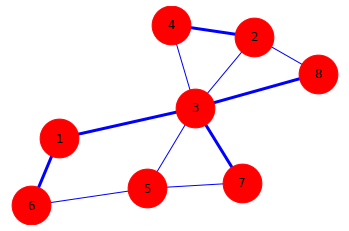

In [11]:
fig, ax = plt.subplots(1)

nx.draw(G, pos, ax, width=tezine, node_size=1500, with_labels=True, node_color='r', edge_color= 'b')

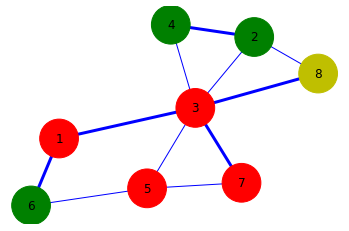

In [12]:
colors = ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
(m, n) = H.shape

for i in range(m):
    for j in range(n):
        if H[i, j] == 1 and j == 0:
            colors[i] = 'r'
            
        elif H[i, j] == 1 and j == 1:
            colors[i] = 'g'
        
        elif H[i, j] == 1 and j == 2:
            colors[i] = 'y'


fig, ax = plt.subplots(1)

nx.draw(G, pos, ax, width=tezine, node_size=1500, with_labels=True, node_color=colors, edge_color= 'b')